In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [3]:
#Посмотреть первые несколько рядов таблицы
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

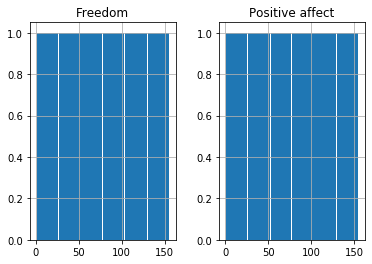

In [27]:
hist = df[['Freedom', 'Positive affect']].hist(bins = 160)

Равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [32]:

print('Среднее=', statistics.mean(df['Freedom'].dropna()))
print('Медиана: ', statistics.median(df['Freedom']))
#print('Значение моды: ', statistics.mode(df['Freedom']))
print('Минимум: ', min(df['Freedom']))
print('Минимум: ', max(df['Freedom']))

Среднее= 78.0
Медиана:  71.0
Минимум:  1.0
Минимум:  155.0


In [33]:
df['Freedom'].describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Freedom, dtype: float64

In [34]:
# первый выброс
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


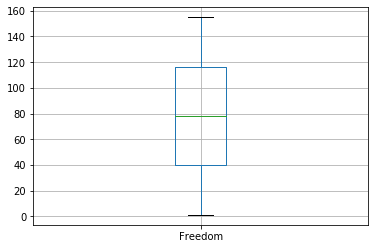

In [37]:
boxplot = df.boxplot(column=['Freedom'])



Почему нельзя найти моду?

In [ ]:
Моду нельзя найти, т.к. равномерное распределение, т.е. каждое значение встречается одинаковое количество раз (один)


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6818


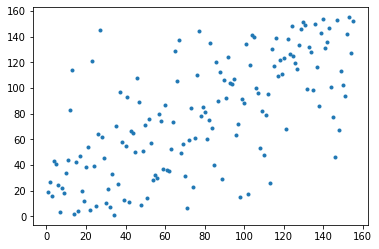

In [38]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Freedom'].dropna(), df['Positive affect'].dropna())
plt.scatter(df['Freedom'].dropna(), df['Positive affect'].dropna(), marker='.')
print('Коэффициент корреляции Пирсона:', round(corr,4))

In [ ]:
from sklearn import preprocessing

Знак коэффициента Пирсона говорит о положительной корреляции между переменными: с ростом Freedom растет Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [47]:
duration_1 = df['Freedom']
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
df['Freedom'] = duration_2
print(min(df['Freedom']))
print(max(df['Freedom']))

-1.0
1.0


Построить матрицу корреляций для всех колонок таблицы

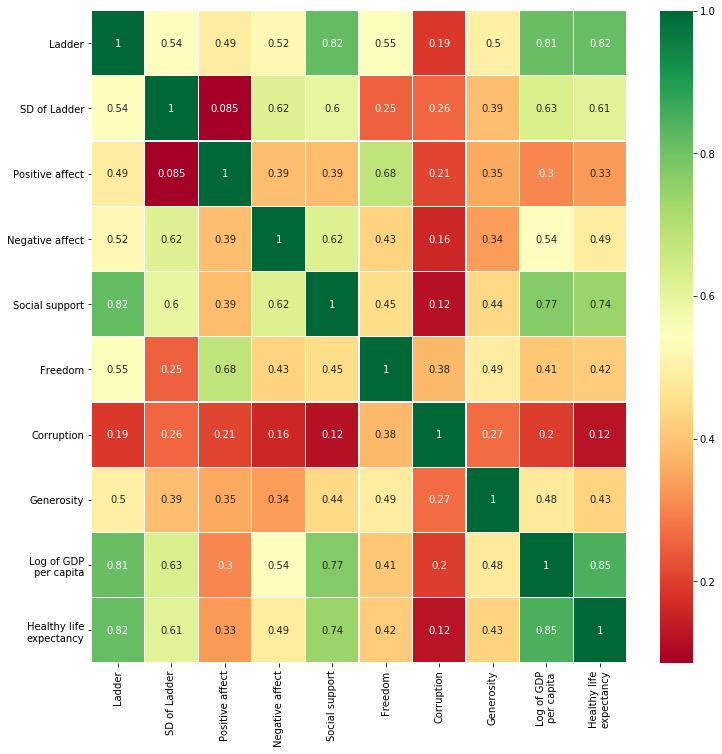

In [39]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо:

In [50]:
df = pd.read_csv('avocado.csv')

In [51]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

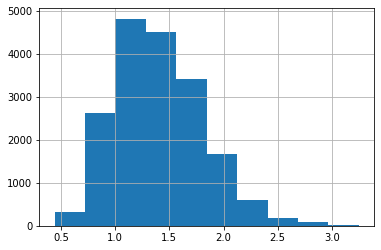

In [52]:
hist = df['AveragePrice'].hist()

Распределение близкое к нормальному

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

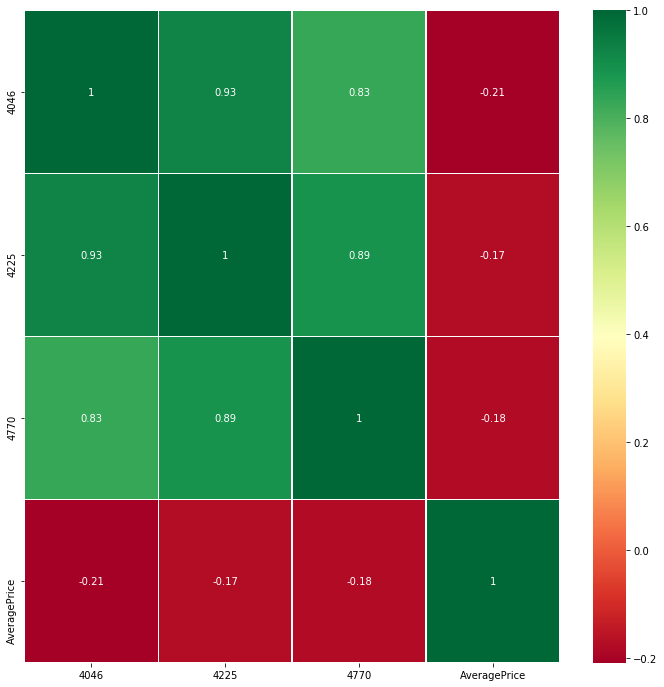

In [54]:
import seaborn as sns
sns.heatmap(df[['4046', '4225', '4770', 'AveragePrice']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Есть высокая корреляция между параметрами '4046', '4225', '4770'. Это может говорить о том, что они отображают одну и ту же информационную "сущность", и для дальнейшего анализа данных можно применить методы понижения размерности с минимальной потерей значимой информации